In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import plotly.express as px
from statistics import variance
import seaborn as sns
import networkx as nx
import yfinance as yf

In [ ]:
pip install seaborn

**Importing the necessary data for NSE stocks**

In [ ]:
nse_stock_symbols = [
    " HDIL", "HEXAWARE", "MCDOWELL-N", "RBL", "MARUTI",
    "CUMMINSIND", "MRPL", "CHOLAFIN", "ASHOKLEY",
    "PNB", "TITAN", "INDUSINDBK", "ZEEL", "CADILAHC",
    "BATAINDIA", "GLENMARK", "PFC", "M&M", " SUZLON",
    "BANKBARODA", "APOLLOHOSP", "SAIL", "ADANITRANS", "BHARATFORG",
    "HEROMOTOCO", "MARICO", "TORNTPHARM", "VOLTAS", "MINDAIND",
    "INFOEDGE", "COLPAL", "HINDZINC", "HAVELLS",
    "SRTRANSFIN", "SUNPHARMA", "LT", "SHRIRAMCIT", "BEL",
    "APOLLOTYRE", "SAIL", "JETAIRWAYS", "HCLTECH",
    "SRF", "IGL", "KOTAKBANK", " HDFCBANK", "ZEEL", "APOLLOTYRE", "ZEEL", "GLENMARK", "CUMMINSIND","MRF", "RAMCOIND", "IGL",
    "GODREJIND", "GAIL", "HINDZINC", "BEL",
    "COFORGE", "MFSL", "ASHOKLEY", "PEL", "MINDAIND",
    "CHOLAFIN", "VIPIND", "MRPL", "HINDZINC", "BATAINDIA",
    "IOC", "RELINFRA",
    "NATIONALUM", "HDFC", "GODREJCP","FEDERALBNK", "GRASIM", "BHEL",
    "VOLTAS", "PNB", "ASHOKLEY", "EXIDEIND", "APOLLOTYRE",
    "OFSS", "BEL", "REC", "VIPIND", "VOLTAS","CESC", "MANAPPURAM", "PETRONET", "HAVELLS", "BIOCON",
    "HDFCERGO", "LUPIN", "ACC", "TVSMOTOR", "CASTROLIND",
    "GODREJCP", "BERGERPAINT", "MARICO",
    "BHARTIINFRAT", "BAJAJHLDNG", "PGHH", "TATAPOWER", "RAMCOCEM",
    "COLGATE", "PIDILITIND", "HDFCLIFE", "PEL", "HINDPETRO",
    "ESCORTS", "PFIZER", "LICHSGFIN", "CADILAHC", "BOSCHLTD",
    "SAIL", "EXIDEIND", "THYROCARE", "GLAXO", "APOLLOHOSP",
    "AUROPHARMA", "CONCOR", "PFC", "BBTC", "OFSS", "VIPIND",
    "MINDTREE", "FEDERALBNK",
    "ITI", "PNB", "APOLLOHOSP", "RAMCOSYS", "AXISBANK", "HCLTECH", "WIPRO", "MARUTI", "NTPC",
    "ONGC", "BAJAJFINSV", "CIPLA", "NTPC", "TATAMOTORS",
    "GAIL", "JSWSTEEL", "NESTLEIND", "TATASTEEL", "SUNPHARMA",
    "BPCL", "BRITANNIA", "HEROMOTOCO", "GAIL", "BAJFINANCE",
    "ULTRACEMCO", "M&M", "UPL", "KOTAKBANK", "SHREECEM",
    "NTPC", "HDFCLIFE", "DIVISLAB", "BHARTIARTL", "ICICIPRULI",
    "LTI", "RECLTD", "GRASIM", "HINDALCO", "IOC", "HDFCLIFE",
    "MOTHERSUMI", " HDIL", "AMBUJACEM", "PEL", "LT",
     "PIDILITIND","GLENMARK", "ADANITRANS", "BERGEPAINT", "COLPAL","RELIANCE", "TCS", "HINDUNILVR", "INFY", "HDFCBANK",
    "ITC", "SBIN", "LT", "ICICIBANK", "HDFC"]

unique_symbols = list(set(nse_stock_symbols))

# Add ".NS" to each stock symbol
nse_stock_symbols = [symbol + '.NS' for symbol in unique_symbols]
df=yf.download(nse_stock_symbols,'2004-01-01','2012-12-31',group_by='column', actions='append')['Adj Close']

[*********************100%%**********************]  128 of 128 completed
ERROR:yfinance:
22 Failed downloads:
ERROR:yfinance:['HDFCERGO.NS', 'COLGATE.NS', 'CADILAHC.NS', 'SRTRANSFIN.NS', 'REC.NS', ' HDIL.NS', 'LTI.NS', 'MINDAIND.NS', 'HEXAWARE.NS', 'ADANITRANS.NS', 'HDFC.NS', 'BHARTIINFRAT.NS', 'BERGERPAINT.NS', 'MINDTREE.NS', ' HDFCBANK.NS', 'INFOEDGE.NS', 'SHRIRAMCIT.NS', 'MOTHERSUMI.NS', ' SUZLON.NS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
ERROR:yfinance:['ICICIPRULI.NS', 'THYROCARE.NS', 'HDFCLIFE.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1072895400, endDate = 1356892200")


**Importing the necessary data for NYSE stocks**

In [ ]:
# Get a list of all NYSE stocks
nyse_stocks = yf.Tickers('nyse')

nyse_symbols = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'IBM', 'TSLA', 'JPM', 'GS', 'WMT', 'DIS',
    'CSCO', 'INTC', 'C', 'BA', 'V', 'GE', 'NFLX', 'GS', 'BAC', 'GOOG',
    'AAP', 'HD', 'VZ', 'CVX', 'PFE', 'MRK', 'T', 'XOM', 'CAT', 'KO',
    'GM', 'F', 'UBER', 'LYFT', 'SBUX', 'MCD', 'NKE', 'WFC', 'COST', 'COP',
    'JNJ', 'PG', 'PEP', 'V', 'VLO', 'WFC', 'COP', 'JPM', 'BABA', 'WBA',
    'AAL', 'BA', 'LMT', 'MMM', 'AA', 'ABBV', 'ABT', 'ACN', 'ADBE', 'ADI',
    'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIV', 'AIZ',
    'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMCR',
    'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM',
    'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATO', 'ATVI',
    'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY',
    'BDX', 'BEN', 'BF.B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL',
    'BMY', 'BR', 'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT',
    'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CELG', 'CERN',
    'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA',
    'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO',
    'COP', 'COST', 'COTY', 'CPB', 'CPRI', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS',
    'CTL', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD',
    'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH',
    'DLR',
    'IQV', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'JBHT', 'JCI', 'JKHY',
    'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB',
    'KMI', 'KMX', 'KO', 'KR', 'KSU', 'L', 'LB', 'LDOS', 'LEG', 'LEN', 'LH',
    'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV',
    'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAC', 'MAR', 'MAS', 'MCD', 'MCHP',
    'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM',
    'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSCI', 'MSFT',
    'MSI', 'MTB', 'MTD', 'MU', 'MXIM', 'MYL', 'NBL', 'NCLH', 'NDAQ', 'NEE',
    'NEM', 'NFLX' ]


# Define a list of NYSE stock symbols you are interested in
#nyse_symbols = nyse_symbols

# Define the time period (2015-2018)
start_date = '2004-01-01'
end_date = '2012-12-31'

# Download historical stock data
stock_data = yf.download(nyse_symbols, start=start_date, end=end_date)

# Extract the adjusted closing prices
closing_prices = stock_data['Adj Close']

[**********************80%%************          ]  200 of 251 completed

$BF.B: possibly delisted; No price data found  (1d 2004-01-01 -> 2012-12-31)


[*********************100%%**********************]  251 of 251 completed
ERROR:yfinance:
37 Failed downloads:
ERROR:yfinance:['MYL', 'KSU', 'BLL', 'CTXS', 'ATVI', 'CXO', 'NBL', 'COG', 'ALXN', 'DISCK', 'CTL', 'DISH', 'BRK.B', 'CELG', 'DISCA', 'MXIM', 'ARNC', 'CERN', 'ANTM']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
ERROR:yfinance:['ALLE', 'UBER', 'CDW', 'IR', 'CFG', 'COTY', 'CTVA', 'IQV', 'KHC', 'ABBV', 'LW', 'KEYS', 'NCLH', 'LYFT', 'BABA', 'LB', 'ANET']: YFChartError("%ticker%: Data doesn't exist for startDate = 1072933200, endDate = 1356930000")
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2004-01-01 -> 2012-12-31)')


In [ ]:
for col in df.columns:
  if(df[col].isnull().sum() >= len(df)/5):
    df.drop(col,axis=1,inplace=True)

Here we are calculating returns as log of percentage change of close prices on x and x+1 day. Then using those values too create a correlation matrix based on correlation of returns


In [ ]:
#df.index = df.index.astype(int)
returns = df.pct_change().apply(lambda x: np.log(1 + x))
subset_returns = returns.iloc[:30, :30]
correlation_matrix_subset= subset_returns.corr()
# Calculate the correlation matrix
correlation_matrix = returns.corr()

In [ ]:
closing_prices

Ticker,AA,AAL,AAP,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADM,...,T,TSLA,UBER,V,VLO,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,70.473251,NaN,23.670994,0.321272,NaN,12.109863,18.531673,19.518398,28.786577,9.562067,...,4.519000,NaN,NaN,NaN,6.094928,11.592030,21.721180,16.337437,11.543293,20.755896
2004-01-05,72.781700,NaN,23.455858,0.334709,NaN,12.109863,19.060732,19.867832,29.672983,9.649734,...,4.676319,NaN,NaN,NaN,6.224719,11.927453,21.441387,16.416061,11.503566,21.241209
2004-01-06,72.237434,NaN,23.874495,0.333501,NaN,12.021790,18.839098,19.887802,30.339365,9.674782,...,4.688419,NaN,NaN,NaN,6.277698,12.124767,21.307573,16.362700,11.772833,21.098160
2004-01-07,71.693161,NaN,24.624575,0.341050,NaN,12.148719,18.410128,19.694550,30.641123,9.549541,...,4.757662,NaN,NaN,NaN,6.210152,12.149686,20.948690,16.197004,11.803739,20.944910
2004-01-08,72.556488,NaN,23.973351,0.352675,NaN,11.791251,17.795265,18.975479,31.188066,9.518229,...,4.843685,NaN,NaN,NaN,6.151875,12.335796,20.966946,16.191387,11.755179,20.893824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-21,19.126104,12.670445,63.603222,15.820288,NaN,25.459690,54.866707,37.709999,32.591850,20.395012,...,10.858868,2.266667,NaN,34.745884,20.437675,24.932121,24.990850,24.777557,17.928556,54.279263
2012-12-24,19.237690,12.566743,64.064819,15.845878,NaN,25.236118,54.476082,37.529999,32.530048,20.365644,...,10.881443,2.285333,NaN,34.840378,20.198217,24.914955,25.100960,24.734440,17.907665,54.086357
2012-12-26,19.483185,12.472469,63.901909,15.627458,NaN,25.078089,53.947109,37.549999,32.282856,20.167425,...,10.894345,2.239333,NaN,34.513119,20.162298,24.863453,25.231737,24.669765,17.756187,54.179699


In [ ]:
closing_prices.dropna(axis=1,inplace=True)

<ipython-input-45-ae783a9673a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices.dropna(axis=1,inplace=True)


Doing similar things for NYSE data and creating a seperate correlation matrix for NYSE stocks

In [ ]:
# Calculate log returns
returns_nyse = closing_prices.pct_change().apply(lambda x: np.log(1 + x))
subset_returns_nyse = returns_nyse.iloc[:30, :30]
correlation_matrix_nyse_subset = subset_returns_nyse.corr()
correlation_matrix_nyse = returns_nyse.corr()

Visual Representation of the correlation matrix of nse data

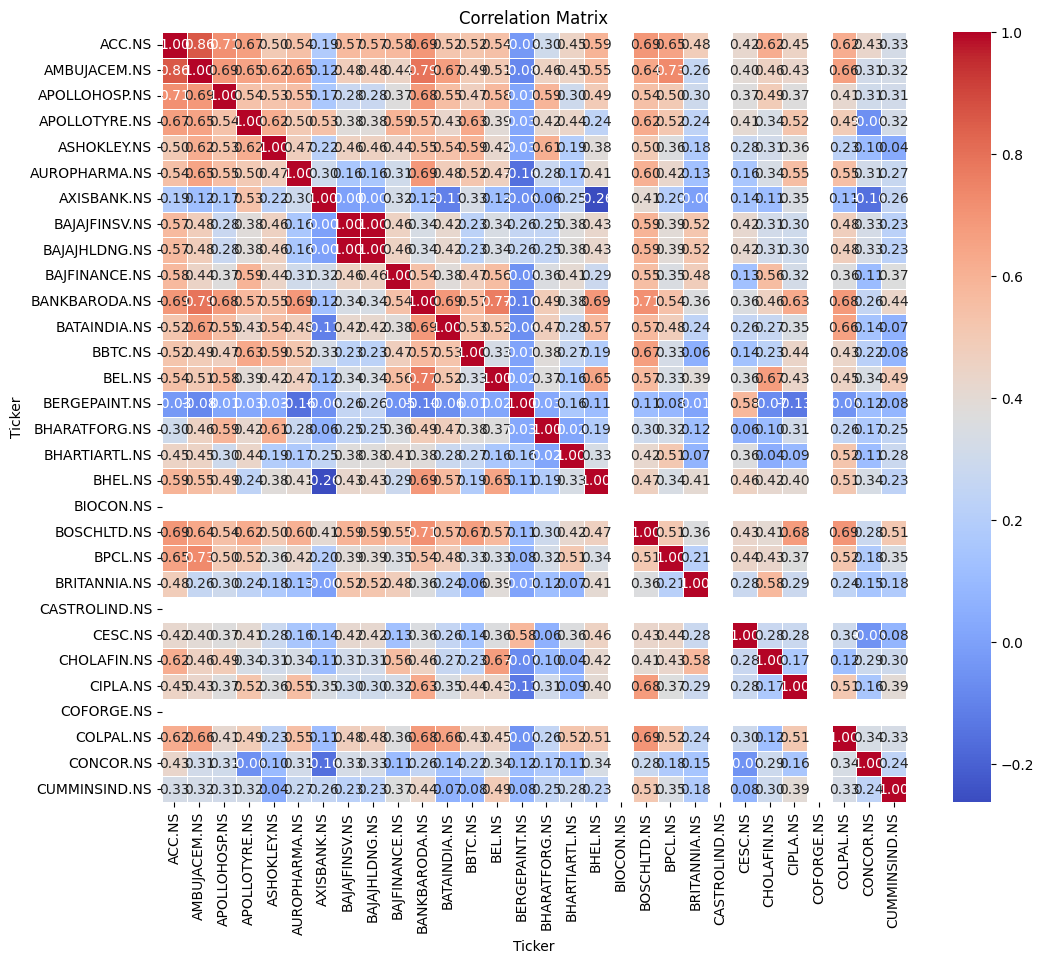

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is your DataFrame with the correlation values
# You might have calculated it using stock prices or returns

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Customize the plot
plt.title("Correlation Matrix")
plt.show()

Visual Representation of the correlation matrix of NYSE data

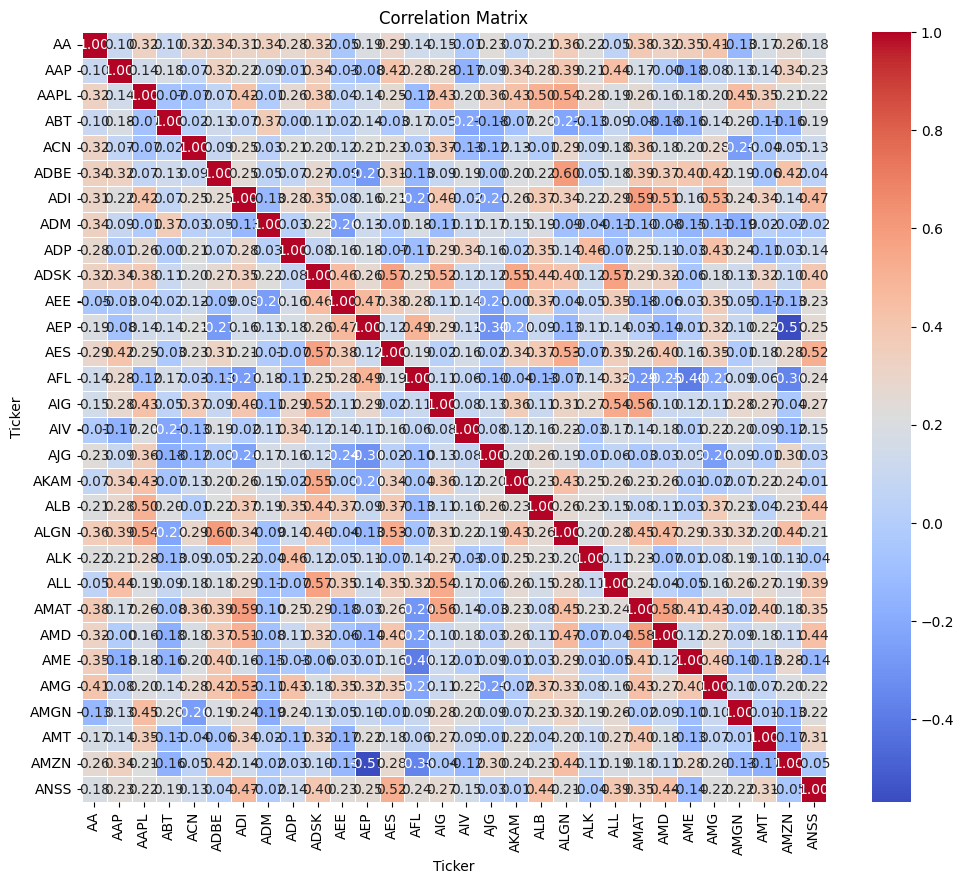

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is your DataFrame with the correlation values
# You might have calculated it using stock prices or returns

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix_nyse_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Customize the plot
plt.title("Correlation Matrix")
plt.show()

Using existing libraries to calculate eigenvalues from correlation matrix. Sorting these eigenvalues and generating the corresponding eigenvectors for them.

In [ ]:
def eigen_spectrum(correlation_matrix):
    """
    Compute eigenvalues and eigenvectors from a correlation matrix.

    Parameters:
    - correlation_matrix: 2D NumPy array, the correlation matrix

    Returns:
    - eigenvalues: 1D NumPy array, the eigenvalues (sorted in descending order)
    - eigenvectors: 2D NumPy array, the eigenvectors corresponding to the sorted eigenvalues
    """
    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort indices in descending order
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvalues, sorted_eigenvectors


In [ ]:
eigenvalues, eigenvectors = eigen_spectrum(correlation_matrix)

Doing similar calculation for NYSE data

In [ ]:
eigenvalues_nyse, eigenvectors_nyse = eigen_spectrum(correlation_matrix_nyse)

Plot of eigen-values belonging to the spectrum for NSE Data, the graph clearly shows one large eigenvalues, few relatively lesser eigenvalues and rest belonging to 0-2 range.

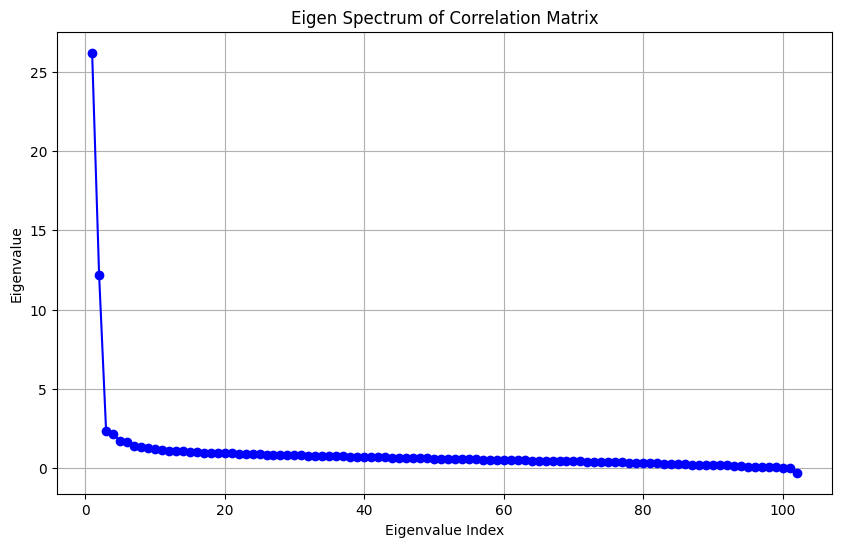

In [ ]:
# Visualize the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.title('Eigen Spectrum of Correlation Matrix')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

Similar eigenvalue analysis for NSE Data

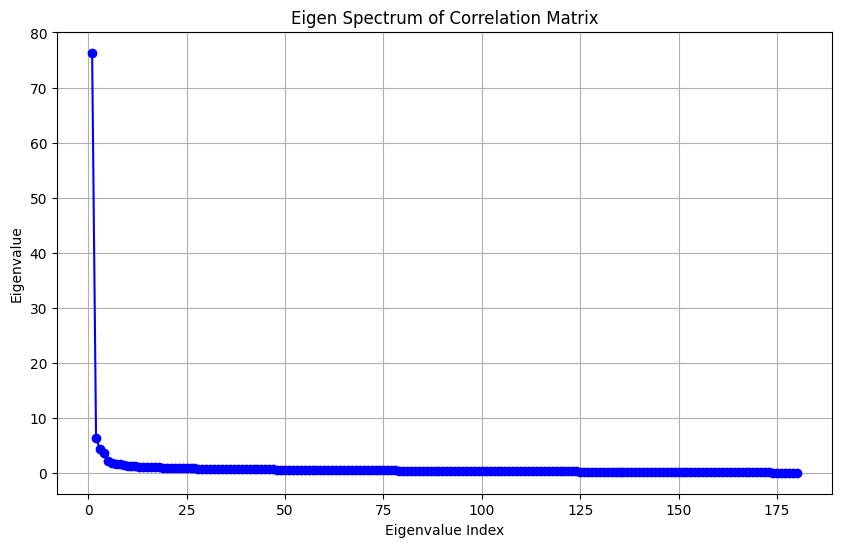

In [ ]:
# Visualize the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues_nyse) + 1), eigenvalues_nyse, marker='o', linestyle='-', color='b')
plt.title('Eigen Spectrum of Correlation Matrix')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

Rough eigenvalue spectrum generated from Random Matrix theory


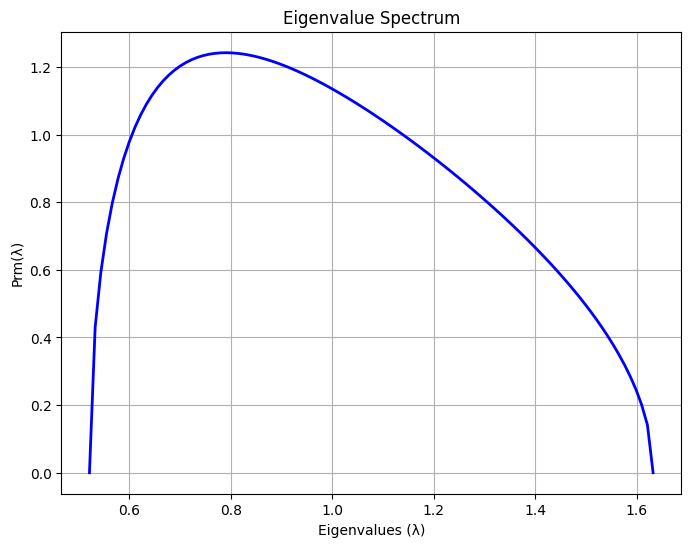

In [ ]:


# Define parameters
N = 201  # Number of stocks
T = 2606  # Number of returns per stock
Q = T / N  # Ratio of T to N

# Compute bounds of the distribution
lambda_min = (1 - 1 /(Q)**(1/2))**2
lambda_max = (1 + 1 /(Q)**(1/2))**2

# Generate eigenvalues according to the Wishart distribution
rmt_eigenvalues = np.linspace(lambda_min, lambda_max, num=100)  # 100 points between lambda_min and lambda_max
Prm = Q * np.sqrt((lambda_max - rmt_eigenvalues) * (rmt_eigenvalues - lambda_min)) / (2 * np.pi * rmt_eigenvalues)

# Plot eigenvalue spectrum
plt.figure(figsize=(8, 6))
plt.plot(rmt_eigenvalues, Prm, 'b-', linewidth=2)
plt.title('Eigenvalue Spectrum')
plt.xlabel('Eigenvalues (λ)')
plt.ylabel('Prm(λ)')
plt.grid(True)
plt.show()



Graphical Analysis of eigenvalues generated from Random Matrix Theory and those obtained from our correlation matrix.This clearly shows that most eigenvalues belong in the range specified by the Random Matrix theory but some larger eigenvalues exist based on group,market,influence

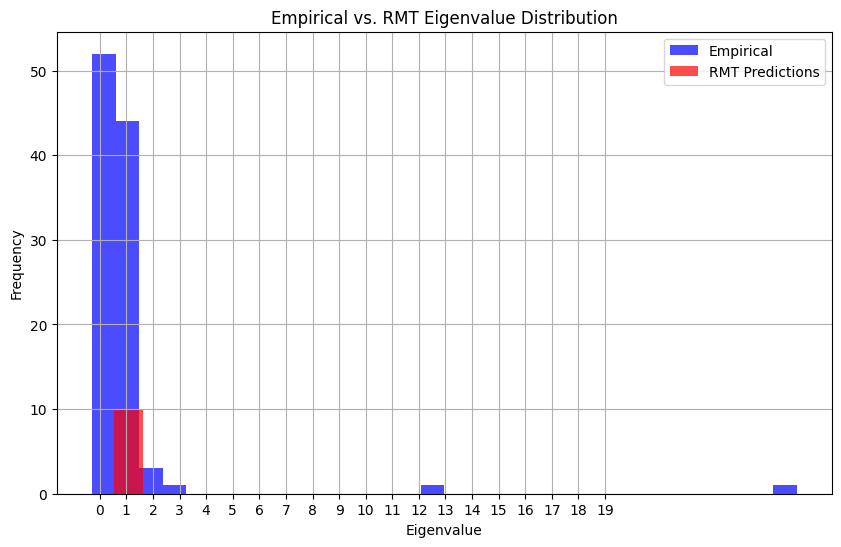

In [ ]:


# Plot histogram
plt.figure(figsize=(10, 6))

# Histogram of empirical eigenvalues
plt.hist(np.linalg.eigvals(correlation_matrix), bins=30, color='blue', alpha=0.7, label='Empirical')

# Histogram of RMT predictions
plt.hist(rmt_eigenvalues, color='red', alpha=0.7, label='RMT Predictions')

plt.title('Empirical vs. RMT Eigenvalue Distribution')
plt.xlabel('Eigenvalue')
plt.ylabel('Frequency')
plt.legend()

# Set x-axis ticks with least count marks of 0.5
plt.xticks(np.arange(0, 20, 1))

plt.grid(True)
plt.show()


Similar analysis for NYSE Data

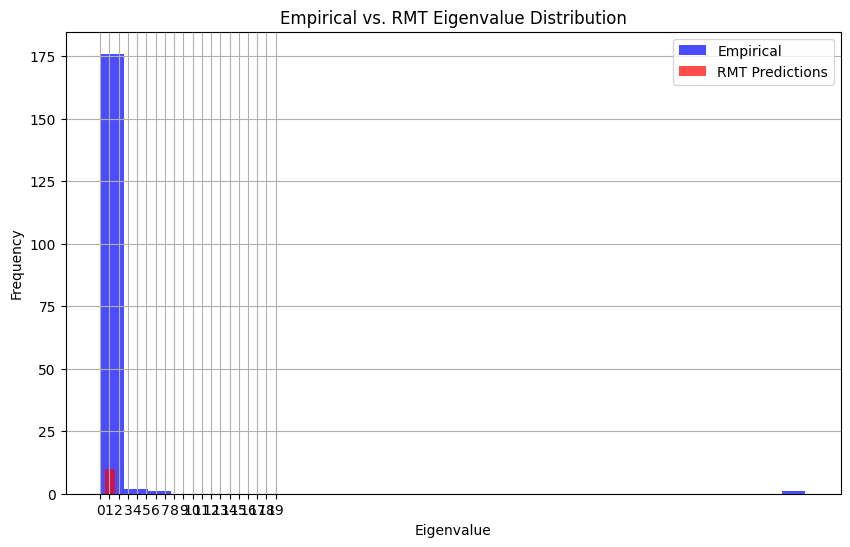

In [ ]:

plt.figure(figsize=(10, 6))

# Histogram of empirical eigenvalues
plt.hist(np.linalg.eigvals(correlation_matrix_nyse), bins=30, color='blue', alpha=0.7, label='Empirical')

# Histogram of RMT predictions
plt.hist(rmt_eigenvalues, color='red', alpha=0.7, label='RMT Predictions')

plt.title('Empirical vs. RMT Eigenvalue Distribution')
plt.xlabel('Eigenvalue')
plt.ylabel('Frequency')
plt.legend()

# Set x-axis ticks with least count marks of 0.5
plt.xticks(np.arange(0, 20, 1))

plt.grid(True)
plt.show()


A calculation of the rough probability density of occurence of different eigenvalues . This follows that values between 0-5 have very high probability with almost nil probability for large eigenvalues.

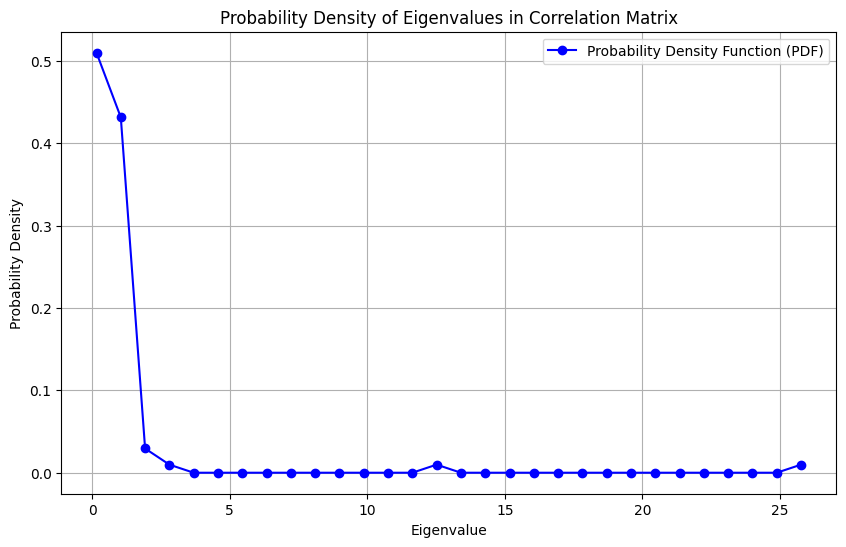

In [ ]:
# Calculate eigenvalues of the correlation matrix
eigenvalues = np.linalg.eigvals(correlation_matrix)

# Calculate probability density function (PDF) using a histogram
hist, bins = np.histogram(eigenvalues, bins=30, density=True)
bin_centers = (bins[1:] + bins[:-1]) / 2
pdf = hist / np.sum(hist)

# Plot the probability density function
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pdf, color='blue', marker='o', linestyle='-', label='Probability Density Function (PDF)')
plt.title('Probability Density of Eigenvalues in Correlation Matrix')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Similar analysis for NYSE Data

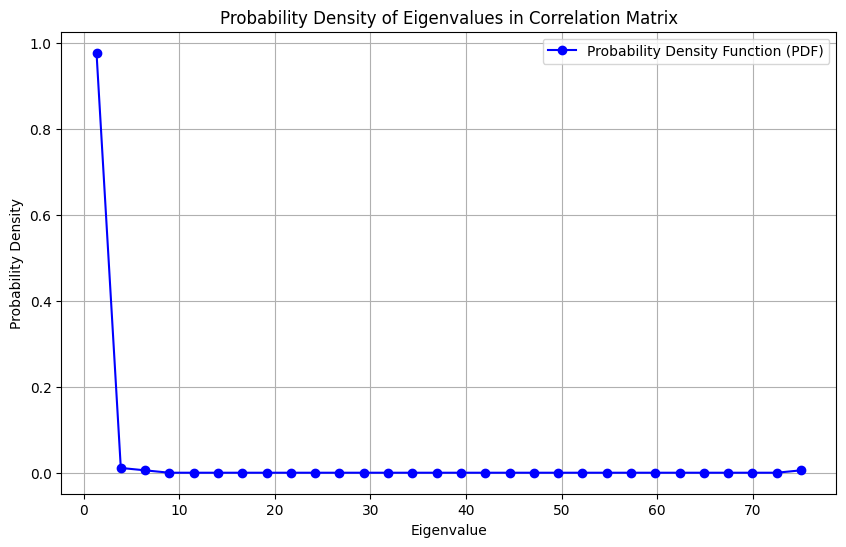

In [ ]:
# Calculate eigenvalues of the correlation matrix
eigenvalues_nyse = np.linalg.eigvals(correlation_matrix_nyse)

# Calculate probability density function (PDF) using a histogram
hist, bins = np.histogram(eigenvalues_nyse, bins=30, density=True)
bin_centers = (bins[1:] + bins[:-1]) / 2
pdf = hist / np.sum(hist)

# Plot the probability density function
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pdf, color='blue', marker='o', linestyle='-', label='Probability Density Function (PDF)')
plt.title('Probability Density of Eigenvalues in Correlation Matrix')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Calculation of IPR Values and Drawing Graphs for NSE Data

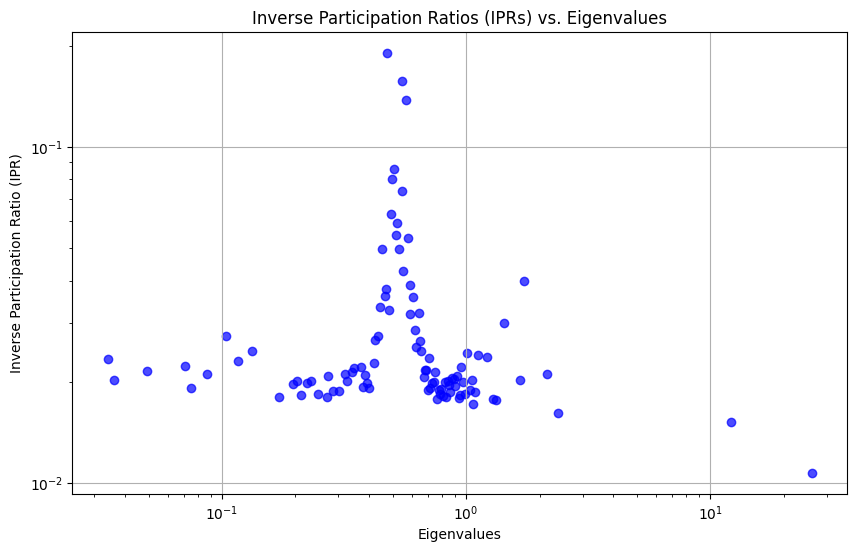

In [ ]:
def calculate_ipr(eigenvector):
    return np.sum(np.square(eigenvector)) / np.square(np.sum(np.abs(eigenvector)))

# Calculate IPR for each eigenvector
ipr_values = [calculate_ipr(eigenvector) for eigenvector in eigenvectors.T]

# Sort eigenvalues and IPR values based on eigenvalues
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]

sorted_ipr_values = np.array(ipr_values)[sorted_indices]

# Plot a scatter plot of IPR values against eigenvalues
plt.figure(figsize=(10, 6))
plt.scatter(sorted_eigenvalues, sorted_ipr_values, color='blue', alpha=0.7)
plt.title('Inverse Participation Ratios (IPRs) vs. Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Inverse Participation Ratio (IPR)')
plt.yscale('log')  # Set y-axis to log scale
plt.xscale('log')
plt.grid(True)
plt.show()


Calculation of IPR Values and Drawing Graphs for NYSE Data

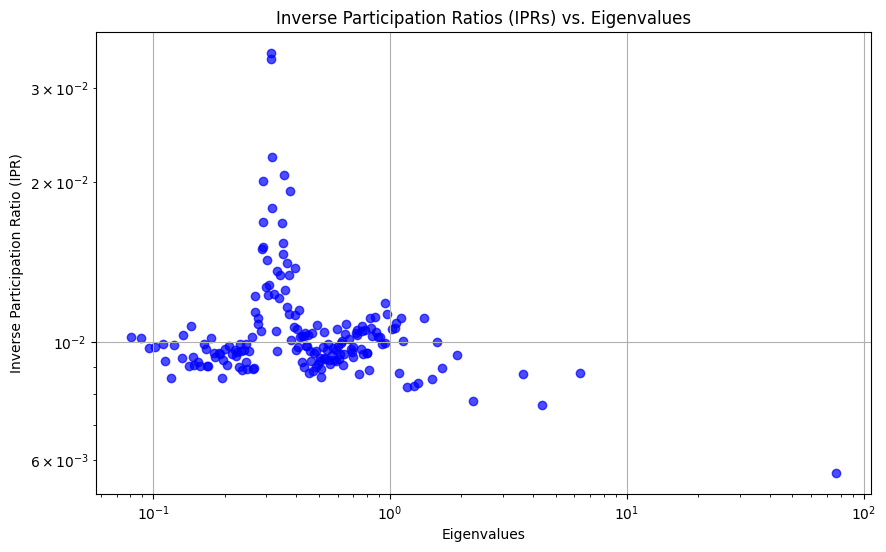

In [ ]:
# Calculate IPR for each eigenvector
ipr_values = [calculate_ipr(eigenvector) for eigenvector in eigenvectors_nyse.T]

# Sort eigenvalues and IPR values based on eigenvalues
sorted_indices = np.argsort(eigenvalues_nyse)
sorted_eigenvalues = eigenvalues_nyse[sorted_indices]
sorted_ipr_values = np.array(ipr_values)[sorted_indices]

# Plot a scatter plot of IPR values against eigenvalues
plt.figure(figsize=(10, 6))
plt.scatter(sorted_eigenvalues, sorted_ipr_values, color='blue', alpha=0.7)
plt.title('Inverse Participation Ratios (IPRs) vs. Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Inverse Participation Ratio (IPR)')
plt.yscale('log')  # Set y-axis to log scale
plt.xscale('log')
plt.grid(True)
plt.show()


Drawing a Graph Network based on coorelation values- So we decompose the original correlation matrix in three parts, extract the common group coorelation matrix. Then we build the corresponding adjacency matrix where Aij=1 if group correlation matrix value Cij > Cth. Now based on this adjacency matrix we build the graph networks containing links between stocks having Aij=1

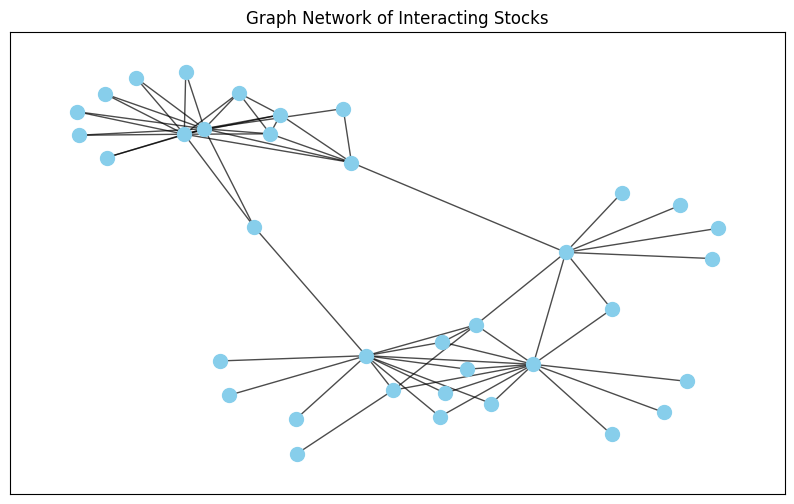

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to decompose correlation matrix and extract the group correlation matrix
def extract_group_correlation(correlation_matrix, Ng):
    # Decompose correlation matrix into market, group, and random components
    eigenvalues, eigenvectors = np.linalg.eigh(correlation_matrix)
    eigenvalues_sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order

    # Initialize matrices for market, group, and random components
    C_market = eigenvalues[0] * np.outer(eigenvectors[:, 0], eigenvectors[:, 0])
    C_group = np.zeros_like(correlation_matrix)
    C_random = np.zeros_like(correlation_matrix)

    # Sum components for group correlation matrix
    for i in range(1, Ng + 1):
        C_group += eigenvalues[i] * np.outer(eigenvectors[:, i], eigenvectors[:, i])
    for i in range(Ng + 1, len(eigenvalues)):
        C_random += eigenvalues[i] * np.outer(eigenvectors[:, i], eigenvectors[:, i])

    return C_group

# Function to create adjacency matrix based on threshold
def create_adjacency_matrix(correlation_matrix, threshold):
    adjacency_matrix = (correlation_matrix > threshold).astype(int)
    np.fill_diagonal(adjacency_matrix, 0)  # Set diagonal elements to 0
    return adjacency_matrix

# Parameters
Ng = 5  # Number of eigenvalues (other than the largest one) which deviates from the bulk of the eigenvalue spectrum
threshold = 0.001  # Threshold for determining adjacency


# Extract the group correlation matrix
C_group = extract_group_correlation(correlation_matrix, Ng)

# Apply threshold to determine adjacency matrix
adjacency_matrix = create_adjacency_matrix(C_group, threshold)

# Construct graph network
G = nx.Graph()  # Create an empty graph
for i in range(len(adjacency_matrix)):
    for j in range(i + 1, len(adjacency_matrix)):  # We only need to iterate over the upper triangle of the matrix
        if adjacency_matrix[i][j] > 0:  # If there is an edge (adjacency value > 0)
            G.add_edge(i, j)  # Add an edge between nodes i and j

# Get connected nodes
connected_nodes = list(G.nodes())

# Plot the network with only connected nodes and edges
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw_networkx_nodes(G, pos, nodelist=connected_nodes, node_size=100, node_color='skyblue')  # Draw nodes
nx.draw_networkx_edges(G, pos, alpha=0.7)  # Draw edges
plt.title('Graph Network of Interacting Stocks')
plt.show()




Doing Similar Analysis for NYSE Data. We can clearly see there are much less connections and groupings among NYSE data even if we keep such a low threshold . This proves the study that NYSE(developed markets) are much less correlated than NSE stocks(developing market)

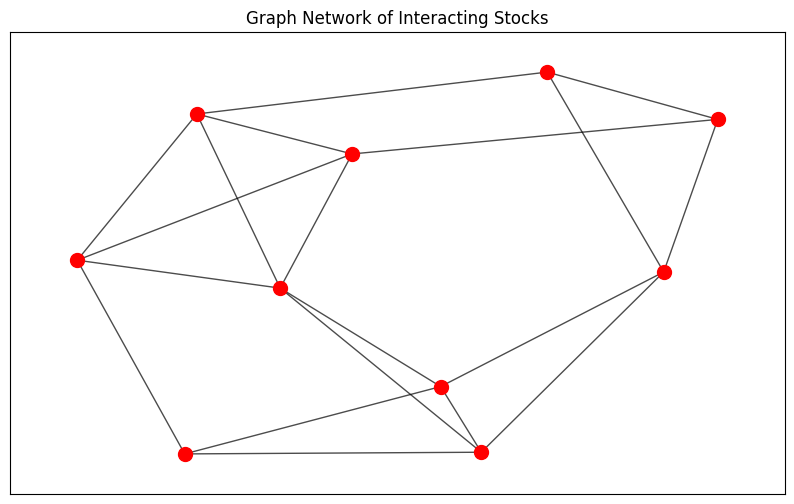

In [ ]:
# Function to decompose correlation matrix and extract the group correlation matrix
def extract_group_correlation(correlation_matrix, Ng):
    # Decompose correlation matrix into market, group, and random components
    eigenvalues, eigenvectors = np.linalg.eigh(correlation_matrix)
    eigenvalues_sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order

    # Initialize matrices for market, group, and random components
    C_market = eigenvalues[0] * np.outer(eigenvectors[:, 0], eigenvectors[:, 0])
    C_group = np.zeros_like(correlation_matrix)
    C_random = np.zeros_like(correlation_matrix)

    # Sum components for group correlation matrix
    for i in range(1, Ng + 1):
        C_group += eigenvalues[i] * np.outer(eigenvectors[:, i], eigenvectors[:, i])
    for i in range(Ng + 1, len(eigenvalues)):
        C_random += eigenvalues[i] * np.outer(eigenvectors[:, i], eigenvectors[:, i])

    return C_group

# Function to create adjacency matrix based on threshold
def create_adjacency_matrix(correlation_matrix, threshold):
    adjacency_matrix = (correlation_matrix > threshold).astype(int)
    np.fill_diagonal(adjacency_matrix, 0)  # Set diagonal elements to 0
    return adjacency_matrix

# Parameters
Ng = 5  # Number of eigenvalues (other than the largest one) which deviates from the bulk of the eigenvalue spectrum
threshold = 0.0001  # Threshold for determining adjacency


# Extract the group correlation matrix
C_group = extract_group_correlation(correlation_matrix_nyse, Ng)

# Apply threshold to determine adjacency matrix
adjacency_matrix = create_adjacency_matrix(C_group, threshold)

# Construct graph network
G = nx.Graph()  # Create an empty graph
for i in range(len(adjacency_matrix)):
    for j in range(i + 1, len(adjacency_matrix)):  # We only need to iterate over the upper triangle of the matrix
        if adjacency_matrix[i][j] > 0:  # If there is an edge (adjacency value > 0)
            G.add_edge(i, j)  # Add an edge between nodes i and j

# Get connected nodes
connected_nodes = list(G.nodes())

# Plot the network with only connected nodes and edges
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Position nodes using Fruchterman-Reingold force-directed algorithm
nx.draw_networkx_nodes(G, pos, nodelist=connected_nodes, node_size=100, node_color='red')  # Draw nodes
nx.draw_networkx_edges(G, pos, alpha=0.7)  # Draw edges
plt.title('Graph Network of Interacting Stocks')
plt.show()